<a href="https://colab.research.google.com/github/JasonPham13UNCC/ECGR-3183_Assignments/blob/main/ECGR_4105_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target

(569, 30)


In [3]:
breast_input = pd.DataFrame(X)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Problem 1**

Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input features for classification. Use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Also, report your results, including accuracy, precision, and recall. Plot the confusion matrix reprsenting your binary classifier.

How about adding a weight penalty here, considering the number of parameters? Add the weight penalty and repeat the training and report the results.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_scaled, Y_train)
Y_pred = classifier.predict(X_test_scaled)

Accuaracy:  0.9824561403508771
Precision:  0.9726027397260274
Recall:  1.0


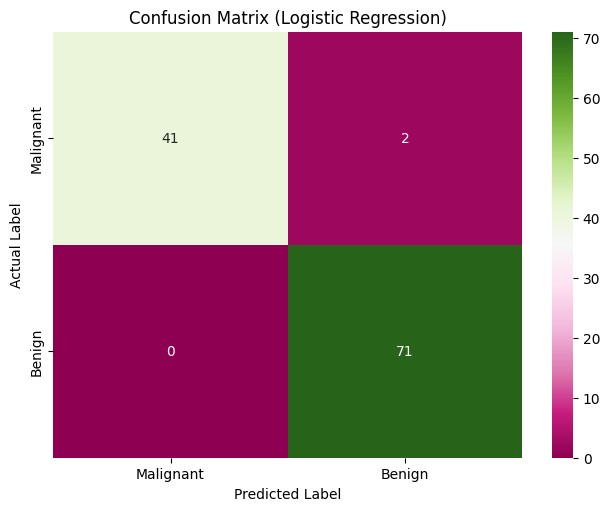

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
cnf_matrix = confusion_matrix(Y_test, Y_pred)
class_names = ["Malignant", "Benign"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

print("Accuaracy: ", accuracy_score(Y_test, Y_pred))
print("Precision: ", precision_score(Y_test, Y_pred))
print("Recall: ", recall_score(Y_test, Y_pred))

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap = "PiYG", fmt = "g", xticklabels = class_names, yticklabels = class_names)
plt.tight_layout()
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

Accuaracy:  0.9824561403508771
Precision:  0.9726027397260274
Recall:  1.0


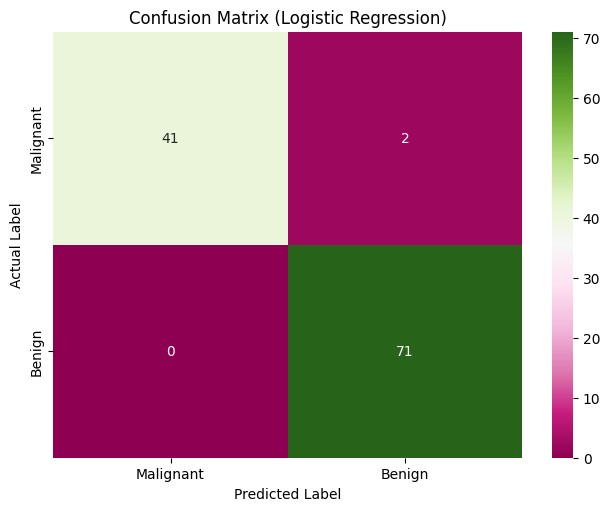

In [8]:
C = 0.1
classifier = LogisticRegression(random_state = 0, C=C, penalty = "l2")
classifier.fit(X_train_scaled, Y_train)
Y_pred = classifier.predict(X_test_scaled)

print("Accuaracy: ", accuracy_score(Y_test, Y_pred))
print("Precision: ", precision_score(Y_test, Y_pred))
print("Recall: ", recall_score(Y_test, Y_pred))

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap = "PiYG", fmt = "g", xticklabels = class_names, yticklabels = class_names)
plt.tight_layout()
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()


**Problem 2**

Use the cancer dataset to build a naive Bayesian model to classify the type of cancer (Malignant vs. benign) Use 80% and 20% split between training and evaluation (test).

Plot your classification accuracy, precision, recall, and F1 score. Explain and elaborate on your results, comparing your results against the logistic regression classifier you did in Problem 2.

Accuaracy:  0.9736842105263158
Precision:  0.9594594594594594
Recall:  1.0
F1 Score:  0.9793103448275862


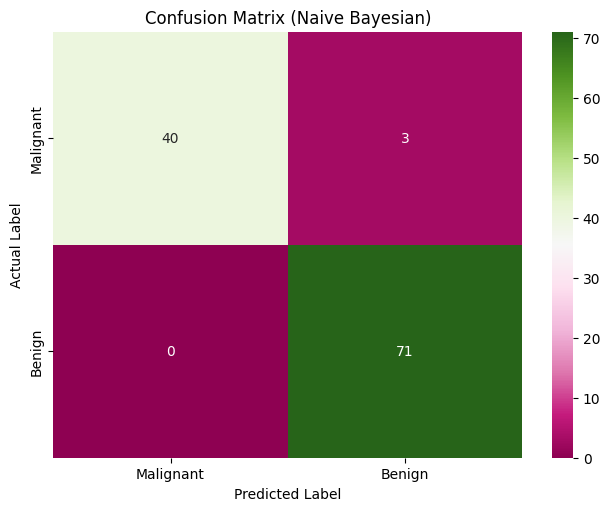

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import seaborn as sns

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

Y_pred = nb_classifier.predict(X_test)

cnf_matrix = confusion_matrix(Y_test, Y_pred)
class_names = ["Malignant", "Benign"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

print("Accuaracy: ", accuracy_score(Y_test, Y_pred))
print("Precision: ", precision_score(Y_test, Y_pred))
print("Recall: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap = "PiYG", fmt = "g", xticklabels = class_names, yticklabels = class_names)
plt.tight_layout()
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (Naive Bayesian)")
plt.show()

Overall, the logistic regression classifier is a little bit better in performance, such as accuracy and precision. The recall shows to be similar.

**Problem 3**

Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, ..., K). Identify the optimum number of K, principal components that achieve the highest classification accuracy.

Plot your classification accuracy, precision, recall, and F1 score over a different number of Ks. Explain and elaborate on your results and compare them against problem 1 and 2.

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Mean Accuracy:  0.9809941520467835
Mean Precision:  0.9714100619922539
Mean Recall:  0.9990610328638497
Mean F1 Score:  0.9850051715568957
Optimal number of principal components (K): 9


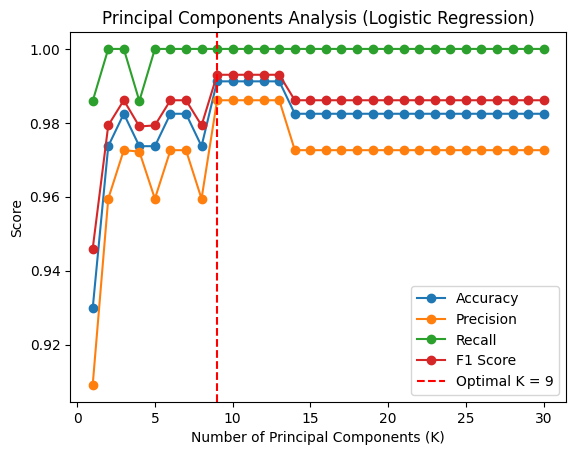

In [11]:
from sklearn.decomposition import PCA

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for k in range(1, X_train.shape[1] + 1):
  pca = PCA(n_components = k)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train_pca, Y_train)
  Y_pred = classifier.predict(X_test_pca)
  accuracy_list.append(accuracy_score(Y_test, Y_pred))
  precision_list.append(precision_score(Y_test, Y_pred))
  recall_list.append(recall_score(Y_test, Y_pred))
  f1_score_list.append(f1_score(Y_test, Y_pred))

optimal_k_index = np.argmax(accuracy_list)
optimal_k = optimal_k_index + 1

print("Mean Accuracy: ", np.mean(accuracy_list))
print("Mean Precision: ", np.mean(precision_list))
print("Mean Recall: ", np.mean(recall_list))
print("Mean F1 Score: ", np.mean(f1_score_list))
print("Optimal number of principal components (K):", optimal_k)

plt.plot(range(1, X_train.shape[1] + 1), accuracy_list, marker="o", label="Accuracy")
plt.plot(range(1, X_train.shape[1] + 1), precision_list, marker="o", label="Precision")
plt.plot(range(1, X_train.shape[1] + 1), recall_list, marker="o", label="Recall")
plt.plot(range(1, X_train.shape[1] + 1), f1_score_list, marker="o", label="F1 Score")
plt.axvline(x=optimal_k, color="red", linestyle="--", label=f"Optimal K = {optimal_k}")
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Principal Components Analysis (Logistic Regression)')
plt.legend()
plt.show()

**Problem 4**

Can you repeat problem 3? This time, replace the logistic regression with Bayesian classifier. Report your reults (classification accuracy, precision, recall, and F1 score). Compare your results against problems 1, 2, and 3.

Mean Accuracy:  0.884502923976608
Mean Precision:  0.8907636252085411
Mean Recall:  0.927699530516432
Mean F1 Score:  0.9085975526692656
Optimal number of principal components (K): 3


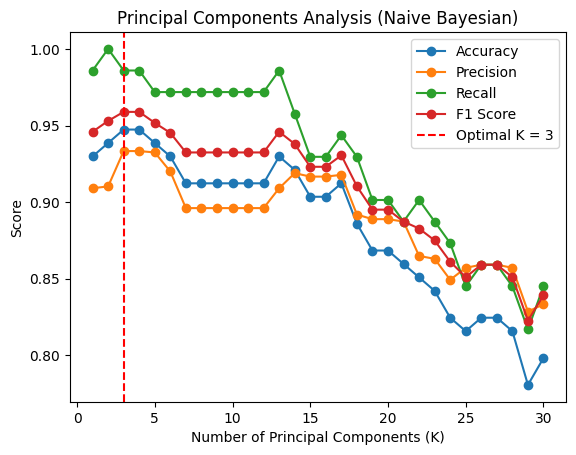

In [13]:
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for k in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    classifier = GaussianNB()
    classifier.fit(X_train_pca, Y_train)
    Y_pred = classifier.predict(X_test_pca)

    accuracy_list.append(accuracy_score(Y_test, Y_pred))
    precision_list.append(precision_score(Y_test, Y_pred))
    recall_list.append(recall_score(Y_test, Y_pred))
    f1_score_list.append(f1_score(Y_test, Y_pred))

optimal_k_index = np.argmax(accuracy_list)
optimal_k = optimal_k_index + 1

print("Mean Accuracy: ", np.mean(accuracy_list))
print("Mean Precision: ", np.mean(precision_list))
print("Mean Recall: ", np.mean(recall_list))
print("Mean F1 Score: ", np.mean(f1_score_list))
print("Optimal number of principal components (K):", optimal_k)

plt.plot(range(1, X_train.shape[1] + 1), accuracy_list, marker="o", label="Accuracy")
plt.plot(range(1, X_train.shape[1] + 1), precision_list, marker="o", label="Precision")
plt.plot(range(1, X_train.shape[1] + 1), recall_list, marker="o", label="Recall")
plt.plot(range(1, X_train.shape[1] + 1), f1_score_list, marker="o", label="F1 Score")
plt.axvline(x=optimal_k, color="red", linestyle="--", label=f"Optimal K = {optimal_k}")
plt.xlabel("Number of Principal Components (K)")
plt.ylabel("Score")
plt.title("Principal Components Analysis (Naive Bayesian)")
plt.legend()
plt.show()